# How Our Face Recognition AI Works

This notebook demonstrates the core concept of **face embeddings** used in our React Native app.

We use the `DeepFace` library with the `ArcFace` model to create a unique mathematical "fingerprint" (an "embedding") for each face. This allows us to compare faces with simple, fast math.

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


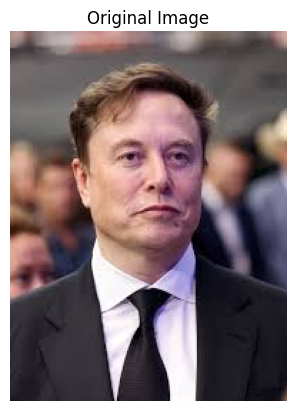

Model: ArcFace
Embedding length: 512 numbers

First 5 values of the embedding:
[-0.1342419981956482, -0.03258444741368294, -0.029987100511789322, -0.0427742600440979, 0.11519481986761093]


In [ ]:

img_path = "/Users/anyagupta/Documents/users_photo/elon_.jpeg"

# 1. Load and show the image
img = cv2.imread(img_path)
plt.imshow(img[:, :, ::-1])
plt.title("Original Image")
plt.axis('off')
plt.show()

# 2. Generate the embedding
# This is the same function we use in our backend!
embedding_obj = DeepFace.represent(img_path, model_name="ArcFace")
embedding = embedding_obj[0]["embedding"]

print(f"Model: ArcFace")
print(f"Embedding length: {len(embedding)} numbers")
print("\nFirst 5 values of the embedding:")
print(embedding[:5])

 The "Match" Test (High Similarity)

Now, we'll prove that two *different* photos of the *same person* have very similar "fingerprints." We use the `DeepFace.verify()` function, which calculates the mathematical "distance" between two embeddings.

In [ ]:

img_path_1 = "/Users/anyagupta/Documents/users_photo/elon_.jpeg"
img_path_2 = "/Users/anyagupta/Documents/users_photo/elon_test2.jpg"

# Use DeepFace.verify to compare them
result = DeepFace.verify(img_path_1, img_path_2, model_name="ArcFace")

# Print the full result
print(result)

print("\n--- Summary ---")
print(f"Distance Score: {result['distance']}")
print(f"Are they a match? {result['verified']}")
print("\n(A low distance (closer to 0) means the faces are very similar. This is a MATCH!)")

{'verified': True, 'distance': 0.321998, 'threshold': 0.68, 'confidence': 82.24, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 51, 'y': 47, 'w': 101, 'h': 101, 'left_eye': (117, 87), 'right_eye': (84, 87)}, 'img2': {'x': 317, 'y': 219, 'w': 550, 'h': 550, 'left_eye': (667, 440), 'right_eye': (492, 446)}}, 'time': 0.28}

--- Summary ---
Distance Score: 0.321998
Are they a match? True

(A low distance (closer to 0) means the faces are very similar. This is a MATCH!)


The "No Match" Test (Low Similarity)

Finally, we'll show that photos of *different people* have very different "fingerprints," resulting in a high distance score.

Our backend code uses this high distance to reject an unknown user.

In [ ]:

# Change these paths to photos of two DIFFERENT people
img_path_1 = "/Users/anyagupta/Documents/users_photo/elon_.jpeg"
img_path_3 = "/Users/anyagupta/Documents/users_photo/modiji.jpeg" # (Use any other person)

result = DeepFace.verify(img_path_1, img_path_3, model_name="ArcFace")

print(result)

print("\n--- Summary ---")
print(f"Distance Score: {result['distance']}")
print(f"Are they a match? {result['verified']}")
print("\n(A high distance (closer to 1.0) means the faces are very different. This is a REJECTION!)")

{'verified': False, 'distance': 0.998743, 'threshold': 0.68, 'confidence': 3.17, 'model': 'ArcFace', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 51, 'y': 47, 'w': 101, 'h': 101, 'left_eye': (117, 87), 'right_eye': (84, 87)}, 'img2': {'x': 73, 'y': 21, 'w': 77, 'h': 77, 'left_eye': None, 'right_eye': None}}, 'time': 0.16}

--- Summary ---
Distance Score: 0.998743
Are they a match? False

(A high distance (closer to 1.0) means the faces are very different. This is a REJECTION!)
